# Singular Value Decomposition

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch14.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

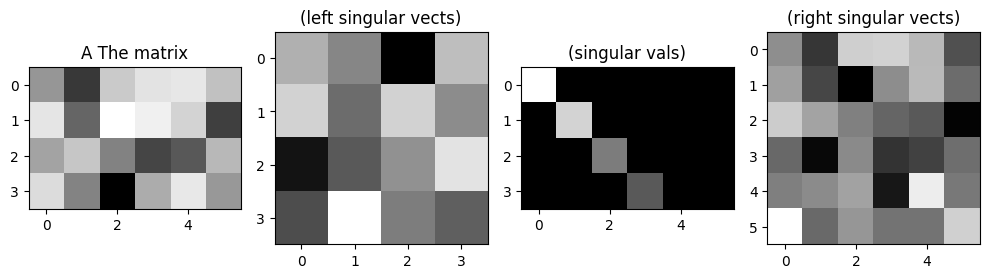

In [2]:
A = np.random.randn(4,6)

U,s,Vt = np.linalg.svd(A)

S = np.zeros(np.shape(A))

np.fill_diagonal(S,s)

# show the matrices
_,axs = plt.subplots(1,4,figsize=(10,6))

axs[0].imshow(A,cmap='gray',aspect='equal')
axs[0].set_title('A The matrix')

axs[1].imshow(U,cmap='gray',aspect='equal')
axs[1].set_title('(left singular vects)')

axs[2].imshow(S,cmap='gray',aspect='equal')
axs[2].set_title('(singular vals)')

axs[3].imshow(Vt,cmap='gray',aspect='equal')
axs[3].set_title('(right singular vects)')

plt.tight_layout()
plt.show()

In [ ]:
# Exercise 14-1

# Eigendecomposition is a special case of SVD, but for symmetrical matrices

A = np.random.randn(5,5)
A = A.T@A

evals,evecs = np.linalg.eig(A)

print(np.sort(evals))
print(evecs)

[ 0.02403575  0.51469659  2.09328735  7.45413465 21.93814981]
[[-0.38958967 -0.8393039  -0.26556861 -0.20567381  0.17595579]
 [-0.32832646  0.28448621 -0.77699535  0.45545745 -0.01029871]
 [ 0.38737222 -0.09866079 -0.42192582 -0.3950077  -0.71144665]
 [ 0.1355257  -0.41348134  0.23918847  0.75429931 -0.42951997]
 [ 0.75630495 -0.18421669 -0.30086378  0.1589285   0.52753176]]


In [19]:
U,s,Vt = np.linalg.svd(A)

print(np.round(U-Vt.T,10)) # remember to compare V not V^T!
print(np.round(U-evecs,10)) # subtract and 


[[-0. -0.  0. -0. -0.]
 [-0. -0. -0.  0. -0.]
 [-0. -0.  0. -0.  0.]
 [-0. -0. -0.  0.  0.]
 [-0. -0.  0.  0. -0.]]
[[-0.          1.67860781 -0.          0.3816296  -0.3816296 ]
 [ 0.         -0.56897242 -0.         -0.46575616  0.46575616]
 [ 0.          0.19732157  0.         -0.31643896  0.31643896]
 [-0.          0.82696267 -0.         -1.18381927  1.18381927]
 [-0.          0.36843338 -0.          0.36860326 -0.36860326]]


In [43]:
# Exercise 14-2
m = 10
n = 4

A = np.random.randn(m,n)

U,s,Vt = np.linalg.svd(A, full_matrices=True)

# print sizes
print(f'Size of A:  {A.shape}')
print(f'Size of U:  {U.shape}')
print(f"Size of V': {Vt.shape}")
print(A)

Size of A:  (10, 4)
Size of U:  (10, 10)
Size of V': (4, 4)
[[-0.34305504 -0.73622363  1.95412277 -0.42754357]
 [-1.76028618 -0.54280758  0.12596503  0.17273548]
 [ 0.10196209  0.8394293   0.82221373  0.6850423 ]
 [ 0.47191164  0.49130891  0.25326375 -0.98186399]
 [-1.44124437  0.06454828  0.30401364  0.77764758]
 [-1.59014312 -0.2251333  -0.03773458  0.84436966]
 [ 1.04442308 -0.75668886  0.22100067  0.37097473]
 [-0.36986762  0.47615589  1.43651577 -0.23327224]
 [-1.67695773 -0.58004711  1.3741814  -1.17619862]
 [-0.70293862 -0.24570061 -2.13038509 -1.0227932 ]]


In [50]:
# Excercise 14-3
A = np.random.randn(4,4)
A = A.T@A

U,s,Vt = np.linalg.svd(A)

In [ ]:
w = np.random.rand(4,1)

print(np.linalg.norm(w))
print(np.linalg.norm(U@w))

# Orthogonal matrices rotate, but do not scale a vector


0.8628788070751721
0.8628788070751722


In [75]:
# Exercise 14-4
m = 10
n = 6

condnum = 42

# Create U and V from random numbers
U,_ = np.linalg.qr( np.random.randn(m,m) )
Vt,_ = np.linalg.qr( np.random.randn(n,n) )

# create singular values vector
s = np.linspace(condnum, 1, np.min((m,n)))

# convert into a matrix
S = np.zeros((m,n))
np.fill_diagonal(S,s)

A = U@S@Vt

np.linalg.cond(A)


np.float64(41.99999999999988)

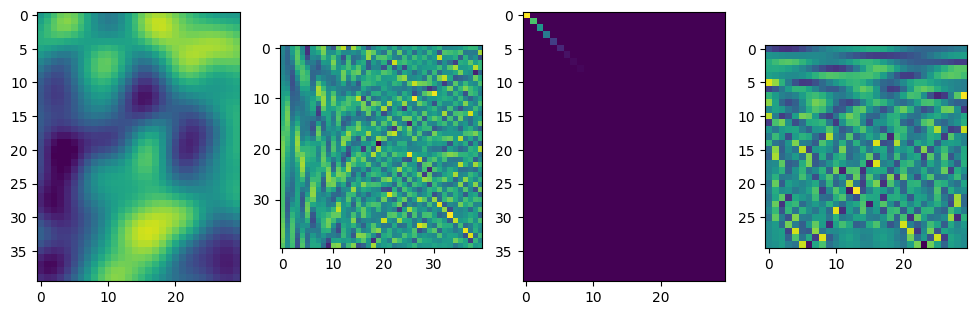

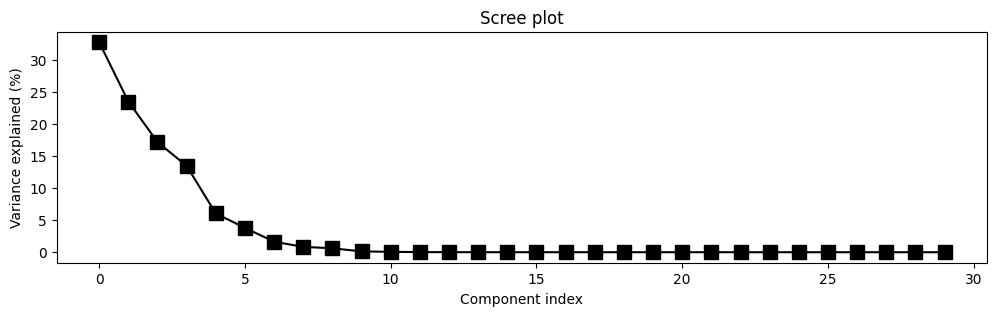

In [103]:
# Exercise 14-5

# create the matrix
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )


# now for the matrix
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n),g2d,mode='same')

U,s,Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)

# SVD plots
_,axs = plt.subplots(1,4,figsize=(12,6))
axs[0].imshow(A, aspect='equal', cmap='viridis', vmin=-10,vmax=10)
axs[1].imshow(U, aspect='equal', cmap='viridis')
axs[2].imshow(S, aspect='equal', cmap='viridis')
axs[3].imshow(Vt, aspect='equal', cmap='viridis')
plt.show()

# scree plot
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s),'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')
plt.show()

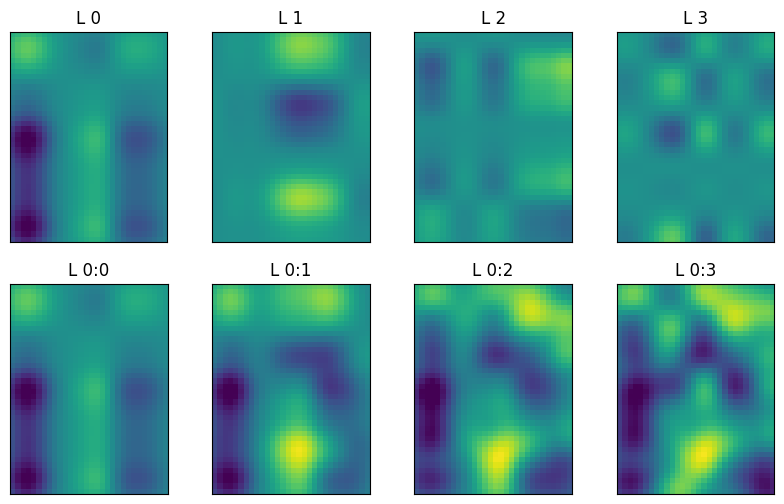

In [134]:
num_layers = 4
rank1mats = np.zeros((num_layers,m,n))

_,axs = plt.subplots(2,num_layers,figsize=(10,6))

# Loop
for i in range(num_layers):
    # Create this layer
    rank1mats[i,:,:] = (U[:,i:i+1] * S[i,i]) @ Vt[i:i+1,:]

    # show this layer
    axs[0,i].imshow(rank1mats[i,:,:],cmap='viridis', vmin=-10,vmax=10)
    axs[0,i].set_title(f'L {i}')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([])

    # show the cumulative sum of layers
    axs[1,i].imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='viridis', vmin=-10,vmax=10)
    axs[1,i].set_title(f'L 0:{i}')
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])


In [133]:
np.outer(U[:,0],Vt[0,:]*S[0,0])

u = U[:,0:0+1]
vt = Vt[0:0+1,:]

print(np.shape(((u * S[i,i]) @ vt)))

(40, 30)
